# Project: Wrangling and Analyze Data

# Table Of Contents
1. [Data Gathering](#data_gathering)
    
    1.1 [Importing Twitter Archived Data](#twitter_archived)
        
    1.2 [Importing Image Predictions Data](#image_predictions)
        
    1.3 [Importing Twitter API Data](#twitter_data)
    
        
2. [Assessing Data](#asessing_data)
    
    2.1 [Twitter Archived Quality](#twitter_archived_quality)
        
    2.2 [Twitter Archived Tidiness](#twitter_archived_tidiness)
        
    2.3 [Image Predicitons Quality](#image_predicitons_tidiness)
        
    2.4 [Twitter Data Quality](#twitter_data_quality)
        
    2.5 [Twitter Data Tidiness](#twitter_data_tidiness)
        
        
3. [Cleaning Data](#cleaning_data)
    
    3.1 [Cleaning Twitter Archived](#twitter_archived_clean)
        
    3.2 [Cleaning Image Predictions](#image_predictions_clean)
        
    3.3 [Cleaning Twitter Data](#twitter_data_clean)
        
    3.4 [Merging All Dataframe](#all_data_clean)
        
        
4. [Storing Data](#storing_data)   
    
    
5. [Analyzing and Visualizing Data](#analyzing_and_visualizing_data)
    
    5.1 [Insights Gained](#insights)
        
    5.2 [Visualization](#visualization)

<a id='data_gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

In [1]:
# import python library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from timeit import default_timer as timer
import json


<a id='twitter_archived'></a>
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# loading the dataset for visual assessment
twitter_archived = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


<a id='image_predictions'></a>
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# importing request library programmatic access and os for creating a folder 
import requests
import os

# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# retrieving data content from an external server
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'    
response = requests.get(url)

# loading the data into tweet-json.text 
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# loading the data for visual assessment
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


<a id='twitter_data'></a>
3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#importing tweepy to get authorization access to Twitter API data, json will be used to store data in JSON format and timeit
#to check wait on rate limit

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# Tweet IDs for which would be used to query Twitter API for additional data
tweet_ids = twitter_archived.tweet_id.values

# querying Twitter API for additional data using the tweet_ids variable 
count = 0
fails_dict = {}
start = timer()

# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump([tweet._json], outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)

In [6]:
# reading the file line by line to get each json data and store in a list

with open('tweet_json.txt','r') as json_file:
    file = []
    for line in json_file:
        lines = line.replace('\n','')
        file.append(lines)
lenght_of_line = len(file)
tweet_id = []
retweet_count = []
favorite_count = []
data = {'tweet_id':[],'retweet_count':[],'favorite_count':[]}
for i in range(lenght_of_line):
    dictionary = json.loads(file[i])
    tweet_id.append(dictionary[0]['id'])
    retweet_count.append(dictionary[0]['retweet_count'])
    favorite_count.append(dictionary[0]['favorite_count'])
data.update({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count}) 
twitter_data = pd.DataFrame(data)

# saving the dataframe into a tweet_json.txt 
twitter_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7024,33865
1,892177421306343426,5305,29365
2,891815181378084864,3488,22089
3,891689557279858688,7237,36988
4,891327558926688256,7775,35365
...,...,...,...
87,875097192612077568,5127,24275
88,875021211251597312,3985,22580
89,874680097055178752,3928,24639
90,874434818259525634,12236,0


<a id='asessing_data'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
# loading the twitter archived data for visual assessment
twitter_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
# loading the twitter archived data for programmatic assessment
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# checking duplicated values
twitter_archived.duplicated().sum()

0

In [10]:
# let's check for missing values
twitter_archived.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
# let's look for outliers
twitter_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> The `rating_denominator` columns displays a max of 170 and a min of 0 which means this column could have outliers.
> The `rating_numerator` columns displays a max of 1776 and a min of 0 which means this column could have outliers.

In [12]:
# let's get the total number of retweets
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> There are 181 rows non-null values in `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`. Therefore there are 181 rows of retweets in the dataset which would need to be dropped

<a id='twitter_archived_quality'></a>
### Twitter archived quality issues

##### Visual Assessment
1. Column named `name`: inaccurate names (a,an,the,...) where seen in the column

2. Column named `source`: html anchor tag should not be included in the observations
    
##### Programmatic Assessment

3. There are 181 rows non-null values in `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`. Therefore there are 181 rows of retweets in the dataset which would need to be dropped

4. Unnecessary columns: `in_reply_to_status_id` (78 instead of 2356), `in_reply_to_user_id` (78 instead of 2356), `retweeted_status_id` (181 instead of 2356), `retweeted_status_user_id` (181 instead of 2356), `retweeted_status_timestamp` (181 instead of 2356), `expanded_urls` (2297 instead of 2356) 

5. Erroneous datatypes: `tweet_id`,`timestamp`


<a id='twitter_archived_tidiness'></a>
### Twitter archived tidiness issues
1. `doggo`, `floofer`, `pupper`, and `puppo` shouldn't be columns instead rows

In [13]:
# loading the image predictions data for visual assessment
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
# loading the twitter archived data for programmatic assessment
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# checking duplicated values
image_predictions.duplicated().sum()

0

In [16]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<a id='image_predicitons_quality'></a>
### Image predictions quality issues

##### Visual Assessment
1. `p1`, `p2`, and `p3` have inconsistent structure in  capitalization of first letters
    
##### Programmatic Assessment
2. Erroneous datatype: `tweet_id`


In [17]:
# loading the image predictions data for visual assessment
twitter_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7024,33865
1,892177421306343426,5305,29365
2,891815181378084864,3488,22089
3,891689557279858688,7237,36988
4,891327558926688256,7775,35365
...,...,...,...
87,875097192612077568,5127,24275
88,875021211251597312,3985,22580
89,874680097055178752,3928,24639
90,874434818259525634,12236,0


In [18]:
# loading the twitter archived data for programmatic assessment
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        92 non-null     int64
 1   retweet_count   92 non-null     int64
 2   favorite_count  92 non-null     int64
dtypes: int64(3)
memory usage: 2.3 KB


In [19]:
# checking duplicated values
twitter_data.duplicated().sum()

0

In [20]:
# let's check for missing values
twitter_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

<a id='twitter_data_quality'></a>
### Twitter_data quality issues

##### Visual Assessment
1. No quality issue on visual assessment
    
##### Programmatic Assessment
2. Erroneous datatype: `tweet_id`

<a id='twitter_data_tidiness'></a>
### Twitter API data tidiness issues
1. Columns `retweet_count` and `favorite_count`: This observaional units should be in the `twitter_archived` table

<a id='cleaning_data'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
twitter_archived_clean = twitter_archived.copy()
image_predictions_clean = image_predictions.copy()
twitter_data_clean = twitter_data.copy()

<a id='twitter_archived_clean'></a>
### Issue #1: Cleaning `twitter_archived_clean` table

#### Define: 
1. Column named `name`: inaccurate names (a,an,the,...) where seen in the column

2. Column named `source`: html anchor tag should not be included in the observations
    
3. There are 181 rows of retweets in the `twitter_archived` table which would need to be dropped    

4. Unnecessary columns: `in_reply_to_status_id` (78 instead of 2356), `in_reply_to_user_id` (78 instead of 2356), `retweeted_status_id` (181 instead of 2356), `retweeted_status_user_id` (181 instead of 2356), `retweeted_status_timestamp` (181 instead of 2356), `expanded_urls` (2297 instead of 2356) 

5. Erroneous datatypes: `tweet_id`, `timestamp`


#### Code for defined issue `1` 

> Due to the fact that name of dog isn’t going to be used in the analysis,  no value will be changed and therefore won't be cleaned.

#### Code for defined issue `2` 

In [22]:
# Pandas splitting function is used to seperate the anchor tags from the links.
new = twitter_archived_clean['source'].str.split('"')
links = []
for link in range(len(new.values)):
    links.append(new.values[i][1])
twitter_archived_clean['source'] = links
twitter_archived_clean['source']

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
                       ...                
2351    http://twitter.com/download/iphone
2352    http://twitter.com/download/iphone
2353    http://twitter.com/download/iphone
2354    http://twitter.com/download/iphone
2355    http://twitter.com/download/iphone
Name: source, Length: 2356, dtype: object

#### Code for defined issue `3` 

In [23]:
# removing retweets from twitter archived table
twitter_archived_clean = twitter_archived_clean[twitter_archived_clean.retweeted_status_id.isnull()]
twitter_archived_clean = twitter_archived_clean[twitter_archived_clean.retweeted_status_user_id.isnull()]
twitter_archived_clean = twitter_archived_clean[twitter_archived_clean.retweeted_status_timestamp.isnull()]

twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

> All retweets have been removed

#### Code for defined issue `4` 

In [24]:
# Due to the fact these columns aren’t going to be used in the analysis, they will be dropped from this analysis.
twitter_archived_clean = twitter_archived_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','retweeted_status_timestamp','expanded_urls'],axis = 1)
twitter_archived_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


#### Code for defined issue `5` 

In [25]:
# tweet_id was changed from int to object data type and timestamp was changed from object to datetime data type
twitter_archived_clean['tweet_id'] = twitter_archived_clean['tweet_id'].astype(str)
twitter_archived_clean['timestamp'] = pd.to_datetime(twitter_archived_clean['timestamp'])
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


#### Code for twitter_archived_clean tidiness issue 

> Some tweets contains two stages and would need to be grouped into a list.

Here are some tweets that contains two stages due to comparison between dogs but should only be regarded as one stage since they are talking about one dog

> After manually inspecting for the tweets above, i was able to query the table for their indexes

In [27]:
twitter_archived_clean[(twitter_archived_clean['doggo'] != 'None')&(twitter_archived_clean['pupper'] != 'None')]['text'][956]

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

> These tweet has doggo and pupper but the image refers to a couch, so it will be dropped

In [28]:
twitter_archived_clean.drop(956,axis=0,inplace=True)

In [29]:
# checking if index exist
956 in twitter_archived_clean['text'].index

False

In [30]:
twitter_archived_clean[(twitter_archived_clean['doggo'] != 'None')&(twitter_archived_clean['pupper'] != 'None')]['text'][575]

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

> This dog is of stage pupper and not doggo, so doggo will be changed to None

In [31]:
# let's use a function to locate the row and columns index of the observation to be cleaned 

def stage(index,column):
    a = -1
    b = -1
    for i in twitter_archived_clean.index:
        a += 1
        if i == index:
            index = a  
    for i in twitter_archived_clean.columns:
        b += 1
        if i == column:
            column = b
    return index,column

# let's test the function
print(stage(575,'doggo'))

(474, 7)


> The function located the row and column indexes accurately

In [32]:
# let's see the output to be cleaned
index,column = stage(575,'doggo')
twitter_archived_clean.iloc[index,column]

'doggo'

In [33]:
# let's change the ouput to none
twitter_archived_clean.iloc[index,column] = 'None'
twitter_archived_clean.iloc[index,column]

'None'

> Would do the same for the rest inaccurate data

In [34]:
twitter_archived_clean[(twitter_archived_clean['doggo'] != 'None')&(twitter_archived_clean['pupper'] != 'None')]['text'][460]

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

> This dog is of stage pupper and not doggo, so doggo will be changed to None

In [35]:
# let's see the output to be cleaned
index,column = stage(460,'doggo')
twitter_archived_clean.iloc[index,column]

'doggo'

In [36]:
# let's change the ouput to none
twitter_archived_clean.iloc[index,column] = 'None'
twitter_archived_clean.iloc[index,column]

'None'

In [37]:
t = twitter_archived_clean[(twitter_archived_clean['doggo'] != 'None')&(twitter_archived_clean['puppo'] != 'None')]
t['text'][191]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

> This dog is of stage puppo and not doggo, so doggo will be changed to None

In [38]:
# let's see the output to be cleaned
index,column = stage(191,'doggo')
twitter_archived_clean.iloc[index,column]

'doggo'

In [39]:
# let's change the ouput to none
twitter_archived_clean.iloc[index,column] = 'None'
twitter_archived_clean.iloc[index,column]

'None'

In [40]:
t = twitter_archived_clean[(twitter_archived_clean['doggo'] != 'None')&(twitter_archived_clean['floofer'] != 'None')]
t['text'][200]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

> This dog is of stage floofer and not doggo, so doggo will be changed to None

In [41]:
# let's see the output to be cleaned
index,column = stage(200,'doggo')
twitter_archived_clean.iloc[index,column]

'doggo'

In [42]:
# let's change the ouput to none
twitter_archived_clean.iloc[index,column] = 'None'
twitter_archived_clean.iloc[index,column]

'None'

In [43]:
t = twitter_archived_clean[(twitter_archived_clean['doggo'] != 'None')&(twitter_archived_clean['pupper'] != 'None')]
t['text'][705]

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

>This dog is of stage doggo and not pupper, so pupper will be changed to None

In [44]:
# let's see the output to be cleaned
index,column = stage(705,'doggo')
twitter_archived_clean.iloc[index,column]

'doggo'

In [45]:
# let's change the ouput to none
twitter_archived_clean.iloc[index,column] = 'None'
twitter_archived_clean.iloc[index,column]

'None'

All inaccurate data for dog stages has been cleaned using a stage function. All 'None' values will be dropped during the exploratory data analysis.

In [46]:
# let's create column named stage that could contain more than one stage of dog
twitter_archived_clean['stage'] = twitter_archived_clean['doggo'] + ' ' + twitter_archived_clean['floofer'] + ' ' + twitter_archived_clean['pupper'] + ' ' +twitter_archived_clean['puppo']
twitter_archived_clean['stage'] = twitter_archived_clean['stage'].str.replace('None','').str.strip()
twitter_archived_clean['stage'] = twitter_archived_clean['stage'].str.replace(r'^\s*$','NaN', regex=True)
twitter_archived_clean['stage'] = twitter_archived_clean['stage'].str.replace('  ',',')
twitter_archived_clean['stage'].value_counts()

NaN             1831
pupper           227
doggo             75
puppo             25
floofer           10
doggo,pupper       6
Name: stage, dtype: int64

> There are 6 rows with two stages and 1831 rows with NaN values

In [47]:
# let's drop the untidy columns
twitter_archived_clean = twitter_archived_clean.drop(columns=['doggo','floofer','pupper','puppo'],axis = 1)
twitter_archived_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN


<a id='image_predictions_clean'></a>
### Issue #2: Cleaning `image_predictions_clean` table

#### Define
1. `p1`, `p2`, and `p3` have inconsistent structure in capitalization of names
2. Erroneous datatype: `tweet_id`

#### Code for defined issue `1` 

#### Test

In [48]:
# Capitalizing each name
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.capitalize()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.capitalize()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.capitalize()
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


#### Code for defined issue `2` 

In [49]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [50]:
image_predictions_clean['tweet_id']

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

<a id='twitter_data_clean'></a>
### Issue #3: Cleaning `twitter_data_clean` table

#### Define
1. Erroneous datatype: `tweet_id`

#### Code

In [51]:
twitter_data_clean['tweet_id'] = twitter_data_clean['tweet_id'].astype(str)

#### Test

In [52]:
twitter_data_clean['tweet_id']

0     892420643555336193
1     892177421306343426
2     891815181378084864
3     891689557279858688
4     891327558926688256
             ...        
87    875097192612077568
88    875021211251597312
89    874680097055178752
90    874434818259525634
91    874296783580663808
Name: tweet_id, Length: 92, dtype: object

<a id='all_data_clean'></a>
### Issue #3: Cleaning `twitter_data_clean`, `image_predictions_clean` and `twitter_archived_clean` table

#### Define
1. All columns in `image_predictions` should be an observaional units of the `twitter_archived_clean` table

2. Columns `retweet_count` and `favorite_count` of `twitter_data_clean` should be an observaional units of the `twitter_archived_clean` table

#### Code

In [53]:
# Pandas merging is used to image_predictions dataframe with twitter_archived dataframe
twitter_archived_clean = pd.merge(twitter_archived_clean,image_predictions_clean,how='left',on='tweet_id')

In [54]:
# Pandas merging is used to twitter_data_clean dataframe with twitter_archived dataframe
twitter_archived_clean = pd.merge(twitter_archived_clean,twitter_data_clean,how='left',on='tweet_id')

#### Test

In [55]:
twitter_archived_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,7024.0,33865.0
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5305.0,29365.0
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3488.0,22089.0
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,7237.0,36988.0
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7775.0,35365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,666049248165822465,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN
2170,666044226329800704,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,...,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,NaN,NaN
2171,666033412701032449,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,NaN,NaN
2172,666029285002620928,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,NaN


#### Define
1. Columns `img_num`, `retweet_count` and `favorite_count` data types changed from int64 to float64 after merging both tables together

#### Code

In [56]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2174 non-null   object             
 1   timestamp           2174 non-null   datetime64[ns, UTC]
 2   source              2174 non-null   object             
 3   text                2174 non-null   object             
 4   rating_numerator    2174 non-null   int64              
 5   rating_denominator  2174 non-null   int64              
 6   name                2174 non-null   object             
 7   stage               2174 non-null   object             
 8   jpg_url             1993 non-null   object             
 9   img_num             1993 non-null   float64            
 10  p1                  1993 non-null   object             
 11  p1_conf             1993 non-null   float64            
 12  p1_dog              1993 non-null 

In [57]:
twitter_archived_clean['img_num'] = twitter_archived_clean['img_num'].fillna(0.0).astype(str).str[:-2].astype('int64')
twitter_archived_clean['retweet_count'] = twitter_archived_clean['retweet_count'].fillna(0.0).astype(str).str[:-2].astype('int64')
twitter_archived_clean['favorite_count'] = twitter_archived_clean['favorite_count'].fillna(0.0).astype(str).str[:-2].astype('int64')

#### Test

In [58]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2174 non-null   object             
 1   timestamp           2174 non-null   datetime64[ns, UTC]
 2   source              2174 non-null   object             
 3   text                2174 non-null   object             
 4   rating_numerator    2174 non-null   int64              
 5   rating_denominator  2174 non-null   int64              
 6   name                2174 non-null   object             
 7   stage               2174 non-null   object             
 8   jpg_url             1993 non-null   object             
 9   img_num             2174 non-null   int64              
 10  p1                  1993 non-null   object             
 11  p1_conf             1993 non-null   float64            
 12  p1_dog              1993 non-null 

<a id='storing_data'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
twitter_archived_clean.to_csv('twitter_archive_master.csv',index=False)

<a id='analyzing_and_visualizing_data'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [60]:
# let's get visual assessment
twitter_archived_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,7024,33865
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5305,29365
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3488,22089
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,7237,36988
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7775,35365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,666049248165822465,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0,0
2170,666044226329800704,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,0,0
2171,666033412701032449,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,0,0
2172,666029285002620928,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0,0


In [61]:
# let's see the summary statistics
twitter_archived_clean.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2174.000000,2174.000000,2174.000000,1993.000000,1.993000e+03,1.993000e+03,2174.000000,2174.000000
mean,13.218951,10.493100,1.103036,0.593803,1.344570e-01,6.027175e-02,211.073137,1034.431003
std,47.736351,7.020691,0.631625,0.271953,1.006920e-01,5.089283e-02,1429.795207,5890.347681
min,0.000000,0.000000,0.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,10.000000,10.000000,1.000000,0.362835,5.390140e-02,1.619920e-02,0.000000,0.000000
50%,11.000000,10.000000,1.000000,0.587507,1.175080e-01,4.952370e-02,0.000000,0.000000
75%,12.000000,10.000000,1.000000,0.845256,1.952180e-01,9.160200e-02,0.000000,0.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,37509.000000,92986.000000


> we have a maximum and minimum rating_numerator of 1776 and 0 respectively, maximum and minimum rating_denominator of 170 and 0 respectively, maximum and minimum retweet_count of 51776 and 0 respectively, and maximum and minimum favorite_count of 124284 and 0 respectively

In [62]:
# let's get the the rating with the highest average favorite_count and retweet count
twitter_archived_clean[['rating_numerator','favorite_count','retweet_count']].groupby(by='rating_numerator').mean().sort_values(by='favorite_count',ascending=False)

,favorite_count,retweet_count
rating_numerator,,
14,4947.186047,1094.232558
13,4454.312704,955.563518
12,1168.162000,205.100000
5,1150.314286,236.628571
17,113.000000,8.000000
11,103.744131,17.894366
75,0.000000,0.000000
80,0.000000,0.000000
84,0.000000,0.000000


> rating `14` had the highest average favorite count and retweet count followed by rating `13`. From visual assessment we see that there is a positive correlation between favorite count and retweet count 

In [63]:
# let's get the hour with the highest average engagements
twitter_archived_clean['hour'] = twitter_archived_clean['timestamp'].dt.hour
twitter_archived_clean[['hour','favorite_count','retweet_count']].groupby(by='hour').mean().sort_values(by='favorite_count',ascending=False)

,favorite_count,retweet_count
hour,,
13,8822.666667,1980.666667
16,2984.649038,549.480769
0,2628.958955,514.805970
15,2552.505155,531.185567
19,1188.500000,433.148936
3,928.395722,228.112299
21,805.948718,155.756410
20,750.160920,142.574713
22,381.920000,75.013333


> we can denote that tweets at the range of 6:00AM tends to have a high average favorite count and retweet count, and from visual assessment we can denote that engagements(favorite count and retweet count) are at a high end from 6.00AM and from 1:00AM to 5:00AM it's at a low end 

In [64]:
# let's see the image number with the most average confident prediction 
twitter_archived_clean[['img_num','p1_conf','p2_conf','p3_conf']].groupby(by='img_num').mean().sort_values(by='p1_conf',ascending=False)

,p1_conf,p2_conf,p3_conf
img_num,,,
4,0.815534,0.059804,0.028127
3,0.766557,0.086940,0.036183
2,0.702738,0.108043,0.048898
1,0.571482,0.140440,0.062979
0,NaN,NaN,NaN


> Due to the left merging of the tables a 0 img_num was added to the table, we can filter them out for now to prevent inaccurate analysis

In [65]:
twitter_archived_clean[['img_num','p1_conf','p2_conf','p3_conf']].groupby(by='img_num').mean().sort_values(by='p1_conf',ascending=False)[:-1]

,p1_conf,p2_conf,p3_conf
img_num,,,
4,0.815534,0.059804,0.028127
3,0.766557,0.086940,0.036183
2,0.702738,0.108043,0.048898
1,0.571482,0.140440,0.062979


> image 4 has the highest average confident prediction for `p1_conf`,image 1 has the highest average confident prediction for `p2_conf` and `p3_conf` respectively. 

In [66]:
# let's check to see if we get the same result if we filter out non-breeds of dogs for p1
p1_dog_true = twitter_archived_clean.query('p1_dog == True')
p1_dog_true[['img_num','p1_conf','p1_dog']].groupby(by=['img_num','p1_dog']).mean().sort_values(by='p1_conf',ascending=False)

,,p1_conf
img_num,p1_dog,
4,True,0.845679
3,True,0.764223
2,True,0.706296
1,True,0.593119


> image number 4 tends to have the highest average confidence prediction for `p1_conf`

In [67]:
# let's check to see if we get the same result if we filter out non-breeds of dogs for p2
p1_dog_true = twitter_archived_clean.query('p2_dog == True')
p1_dog_true[['img_num','p2_conf','p2_dog']].groupby(by=['img_num','p2_dog']).mean().sort_values(by='p2_conf',ascending=False)

,,p2_conf
img_num,p2_dog,
1,True,0.147299
2,True,0.111685
3,True,0.086531
4,True,0.052629


> image number 1 tends to have the highest average confidence prediction for `p2_conf`

In [68]:
# let's check to see if we get the same result if we filter out non-breeds of dogs for p3
p1_dog_true = image_predictions_clean.query('p3_dog == True')
p1_dog_true[['img_num','p3_conf','p3_dog']].groupby(by=['img_num','p3_dog']).mean().sort_values(by='p3_conf',ascending=False)

,,p3_conf
img_num,p3_dog,
1,True,0.064639
2,True,0.050165
3,True,0.039718
4,True,0.028343


> image number 1 tends to have the highest average confidence prediction for `p3_conf`

<a id='insights'></a>
### Insights for `twitter_archived_clean`:
1. rating `14` had the highest average favorite count and retweet count followed by rating `13`. From visual assessment we see that there is a positive correlation between favorite count and retweet count 

2. from visual assessment we can denote that engagements(favorite count and retweet count) are at a peak at 13.00PM and uninteractive hours from 4:00AM to 11:00AM 

3. image 4 has the highest average confident prediction for `p1_conf`,image 1 has the highest average confident prediction for `p2_conf` and `p3_conf` respectively. 

4. we can denote that after filtering out non-breeds of dogs, image number 4 tends to have the highest average confidence prediction for `p1_conf`

5. So we can denote that after filtering out non-breeds of dogs, image number 1 tends to have the highest average confidence prediction for `p2_conf`

6. So we can denote that after filtering out non-breeds of dogs, image number 1 tends to have the highest average confidence prediction for `p3_conf`

<a id='visualization'></a>
### Visualization `twitter_archived_clean`

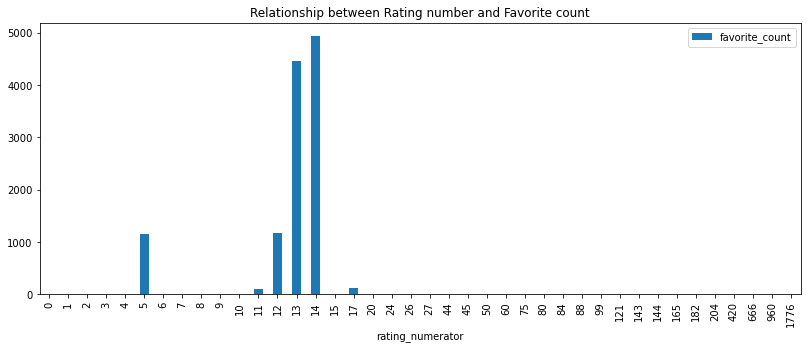

In [69]:
rt = twitter_archived_clean[['rating_numerator','favorite_count','retweet_count']].groupby(by='rating_numerator').mean().sort_values(by='rating_numerator').reset_index()
fig = plt.figure(figsize = (30,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Relationship between Rating number and Favorite count')

rt.plot(x='rating_numerator',y='favorite_count',kind='bar',color=sns.color_palette()[0],ax=ax1);


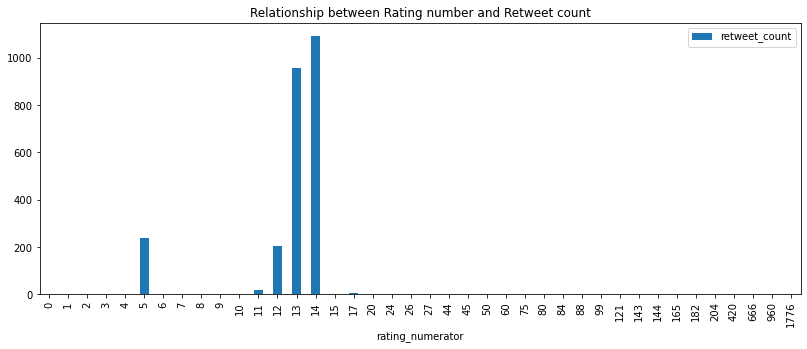

In [70]:
fig = plt.figure(figsize = (30,5))
ax2 = fig.add_subplot(1,2,1)
ax2.set_title('Relationship between Rating number and Retweet count')
rt.plot(x='rating_numerator',y='retweet_count',kind='bar',color=sns.color_palette()[0],ax=ax2);

> rating `14` had the highest average favorite count and retweet count followed by rating `13`. 

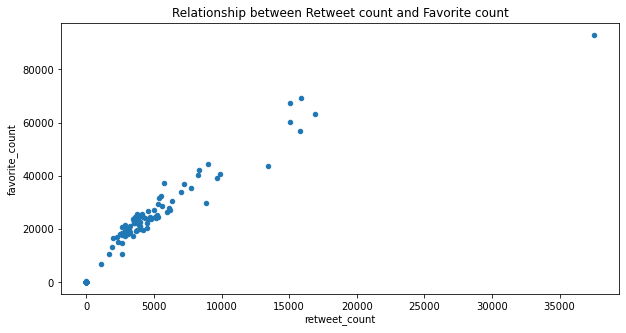

In [71]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('Relationship between Retweet count and Favorite count')
twitter_archived_clean.plot(x='retweet_count',y='favorite_count',kind='scatter',color=sns.color_palette()[0],ax=ax1);

> From visual assessment we see that there is a positive correlation between favorite count and retweet count

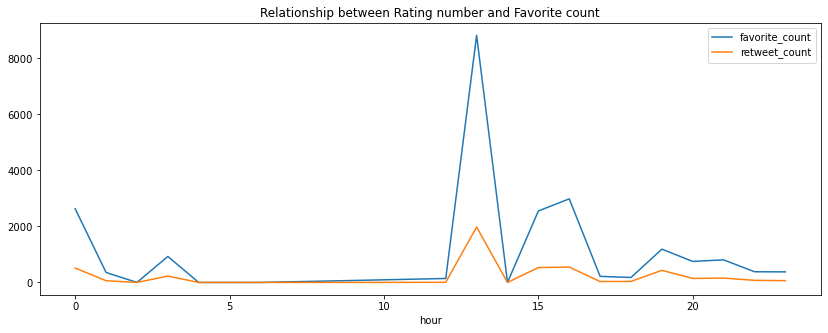

In [72]:
rt = twitter_archived_clean[['hour','favorite_count','retweet_count']].groupby(by='hour').mean().sort_values(by='hour').reset_index()
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('Relationship between Rating number and Favorite count')
rt.plot(x='hour',y='favorite_count',kind='line',color=sns.color_palette()[0],ax=ax1);
rt.plot(x='hour',y='retweet_count',kind='line',color=sns.color_palette()[1],ax=ax1);

> from visual assessment we can denote that engagements(favorite count and retweet count) are at a peak at 13.00PM and uninteractive hours from 4:00AM to 11:00AM 

[[Text(0, 0.0, ''),
  Text(0, 0.01, ''),
  Text(0, 0.02, ''),
  Text(0, 0.03, ''),
  Text(0, 0.04, ''),
  Text(0, 0.05, ''),
  Text(0, 0.06, ''),
  Text(0, 0.07, '')]]

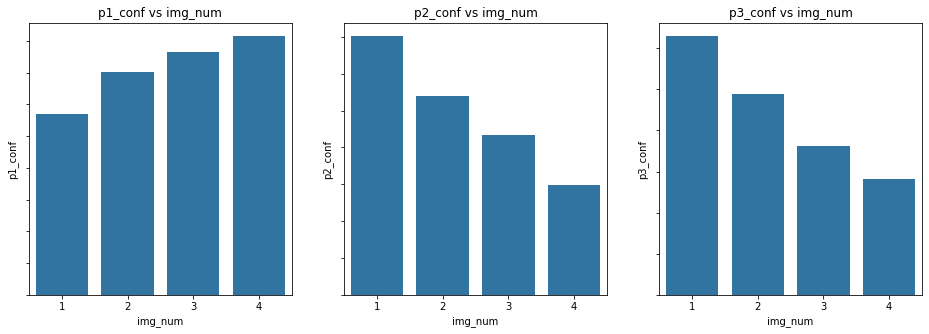

In [73]:
# let's verify the relationship between image number and confident prediction
t = twitter_archived_clean.query('img_num != 0')[['img_num','p1_conf','p2_conf','p3_conf']].groupby(by='img_num').mean().sort_values(by='img_num')
t.reset_index(inplace = True)
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('p1_conf vs img_num')
ax2 = fig.add_subplot(1,3,2)
ax2.set_title('p2_conf vs img_num')
ax3 = fig.add_subplot(1,3,3)#
ax3.set_title('p3_conf vs img_num')
b1 = sns.barplot(data = t,x='img_num',y='p1_conf',ax=ax1,color=sns.color_palette()[0])
b1.set(yticklabels=[])
b2 = sns.barplot(data = t,x='img_num',y='p2_conf',ax=ax2,color=sns.color_palette()[0])
b2.set(yticklabels=[])
b3 = sns.barplot(data = t,x='img_num',y='p3_conf',ax=ax3,color=sns.color_palette()[0])
b3.set(yticklabels=[])

> Image 4 has the highest average confident prediction for `p1_conf`,image 1 has the highest average confident prediction for `p2_conf` and `p3_conf` respectively.

[[Text(0, -0.05, ''),
  Text(0, 0.0, ''),
  Text(0, 0.05, ''),
  Text(0, 0.10000000000000002, ''),
  Text(0, 0.15000000000000002, ''),
  Text(0, 0.2, ''),
  Text(0, 0.25000000000000006, ''),
  Text(0, 0.30000000000000004, '')]]

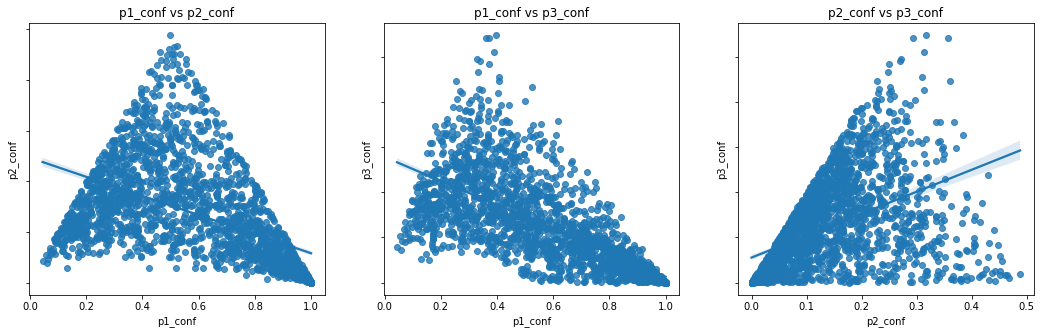

In [74]:
# checking correlations between confident prediction for each picture of dog
fig = plt.figure(figsize = (18,5))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('p1_conf vs p2_conf')
ax2 = fig.add_subplot(1,3,2)
ax2.set_title('p1_conf vs p3_conf')
ax3 = fig.add_subplot(1,3,3)
ax3.set_title('p2_conf vs p3_conf')

b1 = sns.regplot(data = twitter_archived_clean,x='p1_conf',y='p2_conf',ax=ax1,color=sns.color_palette()[0])
b1.set(yticklabels=[])
b2 = sns.regplot(data = twitter_archived_clean,x='p1_conf',y='p3_conf',ax=ax2,color=sns.color_palette()[0])
b2.set(yticklabels=[])
b3 = sns.regplot(data = twitter_archived_clean,x='p2_conf',y='p3_conf',ax=ax3,color=sns.color_palette()[0])
b3.set(yticklabels=[])

> There is a negative correlation in first chart(`p1_conf` and `p2_conf`), negative correlation in second chart(`p1_conf` and `p3_conf`), postive correlation in third chart(`p3_conf` and `p2_conf`)